In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras as K
import DataVisualization
import ManageFilesAndDirectories
from sklearn.model_selection import train_test_split

In [2]:
Data_DF=pd.read_csv('Train.csv')
Data_DF.head()
print(Data_DF.count)

<bound method DataFrame.count of             UID  growth_stage  label_quality
0      nwuCTQKz             4              2
1      NVGUOzWu             1              1
2      1IYVvHwA             1              1
3      8OEdWwmU             1              1
4      oc5iO04j             1              1
...         ...           ...            ...
10690  kofNGJxs             7              1
10691  LTXarO7P             5              2
10692  YiM4pnCK             5              1
10693  pYX0aRyl             7              1
10694  LXUDkic1             1              1

[10695 rows x 3 columns]>


In [4]:
UIDs=list(Data_DF["UID"])
Data_Count=len(UIDs)
# Splitting Data 
Train_UIDs,Val_UIDs=train_test_split(UIDs,test_size=0.2)
Train_UIDs[:10]

['zCijDywV',
 'alAx7qvr',
 'JU2Qz5bk',
 'AHhGmiuN',
 'cwTD8VUg',
 '7yloZpRO',
 '6Lte2DqR',
 'NJmbqR4h',
 'oaFSQOU9',
 'ISChkc8Z']

classe: count  
 {1: 3057, 7: 2335, 4: 1712, 2: 1389, 5: 1092, 3: 689, 6: 421}


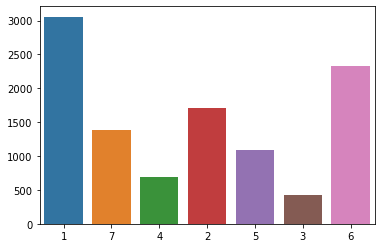

In [5]:
def GetLabel(uid):
    return (Data_DF.loc[Data_DF["UID"]==uid]).iloc[0]["growth_stage"]
classes_count=dict(Data_DF["growth_stage"].value_counts())
print("classe: count  \n",classes_count)
DataVisualization.bar_plot(list(classes_count.keys()),list(classes_count.values()))

In [6]:
classes_weights={k:(sum(classes_count.values())-classes_count[k])/(6*Data_Count) for k,v in classes_count.items()}
classes_weights

{1: 0.1190275829827022,
 7: 0.13027894654823127,
 4: 0.13998753311516285,
 2: 0.1450210378681627,
 5: 0.1496493688639551,
 3: 0.1559295621006701,
 6: 0.16010596852111578}

In [7]:
main_dir=os.getcwd()
#Creating Training, Validation and Testing Folders:
ManageFilesAndDirectories.create_directory("Data")
ManageFilesAndDirectories.create_directory("Data/train")
ManageFilesAndDirectories.create_directory("Data/validation")
ManageFilesAndDirectories.create_directory("Data/test")


True

In [8]:
# Splitting the Data into train,test and validation

train_images_paths=[os.path.join(str(main_dir),"Images",str(f+".jpeg")) for f in Train_UIDs]
val_images_paths=[os.path.join(str(main_dir),"Images",str(f+".jpeg")) for f in Val_UIDs]
ManageFilesAndDirectories.move_batch_files(train_images_paths,"Data/train")
ManageFilesAndDirectories.move_batch_files(val_images_paths,"Data/validation")

test_images_paths=tf.io.gfile.glob(str(main_dir+"/Images/*.jpeg"))
ManageFilesAndDirectories.move_batch_files(test_images_paths,"Data/test")

In [9]:
for p in ("Data/train","Data/validation"):
    for label in classes_count.keys():
        ManageFilesAndDirectories.create_directory(os.path.join(main_dir,str(p),str(label)))

In [10]:
train_images_paths=tf.io.gfile.glob(str(main_dir+"/Data/train/*.jpeg"))
val_images_paths=tf.io.gfile.glob(str(main_dir+"/Data/validation/*.jpeg"))
for f in train_images_paths:
    uid=(f.split("\\")[-1]).split(".")[-2]
    shutil.move(f,os.path.join(main_dir,"Data/train",str(GetLabel(uid))))

for f in val_images_paths:
    uid=(f.split("\\")[-1]).split(".")[-2]
    shutil.move(f,os.path.join(main_dir,"Data/validation",str(GetLabel(uid))))


In [ ]:
# Build Training and Validation Datasets
BATCH_SIZE=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "c:\\Users\\LATITUDE 7490\\Downloads\\Zindi Wheat Growth Stage Challenge\\Images",
    validation_split=0.2,
    subset="training",
    seed=1337,
    batch_size=BATCH_SIZE,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "c:\\Users\\LATITUDE 7490\\Downloads\\Zindi Wheat Growth Stage Challenge\\Images",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    batch_size=BATCH_SIZE,
)